In [1]:
%matplotlib inline

In [4]:
# Dependencies

# %matplotlib notebook
# %matplotlib notebook

import os
import json
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import operator


import numpy as np # linear algebra
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import operator
from pprint import pprint
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import scipy
# import scipy.stats
# from scipy.stats import linregress, sem, ttest_ind
# from spread import variance, standard_deviation, zipped_z_scores
# from stats import mean, median, mode, multi_mode

## Initial Dataset from Kaggle
TMDB 5000 Movie Dataset

In [5]:
# Original Dataframe used for Revenue, Budget information
path = "tmdb_5000_movies.csv"
df = pd.read_csv(path)
df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## API Call
The API call to create the dataset

In [6]:
# title_list_0_5000 = list(df['title'][0:])
# print(title_list_0_5000)


# Test for one movie

# apikey = "trilogy"
# movie = "jack reacher"
# query_url = f"http://www.omdbapi.com/?apikey={apikey}&"
# response = requests.get(f'{query_url}t={movie}').json()
# pprint(response)

# set up lists to hold reponse info

# titles = []
# year = []
# rated = []
# released = []
# runtime = []
# genre = []
# director = []
# writer = []
# language = []
# country = []
# awards = []
# m_ratings = []
# i_ratings = []
# boxoffice = []
# production = []

# record = 0
# loop_set = 1


# # 

# print("Beginning Data Retrieval")
# print("------------------------")

# for title in title_list_0_5000:
#     response = requests.get(f'{query_url}t={title}').json()
#     record += 1
#     #pprint(response)
    
#     try:
#         titles.append(response['Title'])
#         year.append(response['Year'])
#         rated.append(response['Rated'])
#         released.append(response['Released'])
#         runtime.append(response['Runtime'])
#         genre.append(response['Genre'])
#         director.append(response['Director'])
#         writer.append(response['Writer'])
#         language.append(response['Language'])
#         country.append(response['Country'])
#         awards.append(response['Awards'])
#         m_ratings.append(response['Metascore'])
#         i_ratings.append(response['imdbRating'])
#         boxoffice.append(response['BoxOffice'])
#         production.append(response['Production'])
        
        
#         print(f"Processing Record {record} of Set {loop_set}: {title}")
    
#     except(KeyError):
#         print("Title is not found... skipping.")
#         loop_set += 1

# print("------------------------")
# print("Data Retrieval Complete!")
# print("------------------------")

## Post-API Dataset
Create a new data set using the OMDB API call

In [7]:
# Post-API New Dataframe used for Analysis
path = "moviesapi.csv"
new_df = pd.read_csv(path)
new_df.head()

,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,Awards,Metascore,IMDB Rating
0,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"English, Spanish","UK, USA",Won 3 Oscars. Another 85 wins & 128 nominations.,83.0,7.8
1,Pirates of the Caribbean: At World's End,2007,PG-13,169 min,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...","Mandarin, English",USA,Nominated for 2 Oscars. Another 20 wins & 44 n...,50.0,7.1
2,Spectre,2015,PG-13,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","English, Spanish, Italian, German, French","UK, USA",Won 1 Oscar. Another 7 wins & 32 nominations.,60.0,6.8
3,The Dark Knight Rises,2012,PG-13,164 min,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Arabic","UK, USA",Nominated for 1 BAFTA Film Award. Another 38 w...,78.0,8.4
4,John Carter,2012,PG-13,132 min,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton (screenplay by), Mark Andrews (...",English,USA,2 wins & 8 nominations.,51.0,6.6


In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4719 entries, 0 to 4718
Data columns (total 12 columns):
Title          4719 non-null object
Year           4719 non-null object
Rated          4604 non-null object
Runtime        4702 non-null object
Genre          4717 non-null object
Director       4696 non-null object
Writer         4652 non-null object
Language       4709 non-null object
Country        4719 non-null object
Awards         4035 non-null object
Metascore      3960 non-null float64
IMDB Rating    4708 non-null float64
dtypes: float64(2), object(10)
memory usage: 442.5+ KB


## Revenue/Budget Dataframe
OMDB API does not include Revenue and Budget, we used the Revenue and Budget data from the original dataset

In [9]:
# Highest revenue generating movies 
revenue_df = pd.DataFrame({'Title' : df['title'],
                           'Revenue': df['revenue'],
                           'Budget' : df['budget']})
revenue_df.sort_values(by= 'Revenue', ascending=False).head()

,Title,Revenue,Budget
0,Avatar,2787965087,237000000
25,Titanic,1845034188,200000000
16,The Avengers,1519557910,220000000
28,Jurassic World,1513528810,150000000
44,Furious 7,1506249360,190000000


## Final Dataframe
Final dataframe (pre-cleanup)

In [10]:
final_df = pd.merge(new_df, revenue_df, on= "Title")
final_df.head(1)

,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,Awards,Metascore,IMDB Rating,Revenue,Budget
0,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"English, Spanish","UK, USA",Won 3 Oscars. Another 85 wins & 128 nominations.,83.0,7.8,2787965087,237000000


## Data clean-up

In [11]:
final_df['Year'].sort_values(ascending= False).head(10)

3892        2019–
4302         2019
4566         2018
4397         2018
4233         2018
4571         2018
1456    2017–2019
3995         2017
1906         2017
4457         2017
Name: Year, dtype: object

In [12]:
# Finding Year ranges to be removed from dataset

for row, item in enumerate(final_df['Year']):
   try:
      int(item)
   except: # ValueError can be defined to be more specific
      print('ERROR at index {}: {!r}'.format(row, item))

ERROR at index 1456: '2017–2019'
ERROR at index 1670: '1978–1979'
ERROR at index 1729: '1970–'
ERROR at index 2273: '1967–1969'
ERROR at index 3892: '2019–'
ERROR at index 4371: '2008–'
ERROR at index 4478: '2012–'


In [13]:
# Removing year ranges from dataset

final_df = final_df.drop(final_df.index[[1456, 1670, 1729, 2273, 3892, 4371, 4478]])

final_df['Year'].sort_values(ascending= False).head()

4302    2019
4233    2018
4566    2018
4571    2018
4397    2018
Name: Year, dtype: object

In [14]:
# Convert Year column to integer

final_df['Year'] = final_df['Year'].astype(int)

In [15]:
final_df.describe()

,Year,Metascore,IMDB Rating,Revenue,Budget
count,4582.000000,3886.000000,4576.000000,4.582000e+03,4.582000e+03
mean,2002.058708,55.112970,6.425896,8.438551e+07,2.962052e+07
std,12.996240,18.390274,1.091051,1.649530e+08,4.107635e+07
min,1909.000000,1.000000,1.200000,0.000000e+00,0.000000e+00
25%,1999.000000,42.000000,5.800000,0.000000e+00,1.000000e+06
50%,2005.000000,55.000000,6.500000,2.030899e+07,1.500000e+07
75%,2010.000000,68.000000,7.200000,9.570559e+07,4.000000e+07
max,2019.000000,100.000000,9.300000,2.787965e+09,3.800000e+08


In [16]:
# Obtaining info on the columns to see where data needs to be dropped or filled

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4582 entries, 0 to 4588
Data columns (total 14 columns):
Title          4582 non-null object
Year           4582 non-null int64
Rated          4497 non-null object
Runtime        4571 non-null object
Genre          4582 non-null object
Director       4576 non-null object
Writer         4538 non-null object
Language       4575 non-null object
Country        4582 non-null object
Awards         3948 non-null object
Metascore      3886 non-null float64
IMDB Rating    4576 non-null float64
Revenue        4582 non-null int64
Budget         4582 non-null int64
dtypes: float64(2), int64(3), object(9)
memory usage: 537.0+ KB


In [17]:
final_df = final_df.drop(['Metascore'], axis=1)
final_df.head()

,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,Awards,IMDB Rating,Revenue,Budget
0,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"English, Spanish","UK, USA",Won 3 Oscars. Another 85 wins & 128 nominations.,7.8,2787965087,237000000
1,Pirates of the Caribbean: At World's End,2007,PG-13,169 min,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...","Mandarin, English",USA,Nominated for 2 Oscars. Another 20 wins & 44 n...,7.1,961000000,300000000
2,Spectre,2015,PG-13,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","English, Spanish, Italian, German, French","UK, USA",Won 1 Oscar. Another 7 wins & 32 nominations.,6.8,880674609,245000000
3,The Dark Knight Rises,2012,PG-13,164 min,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Arabic","UK, USA",Nominated for 1 BAFTA Film Award. Another 38 w...,8.4,1084939099,250000000
4,John Carter,2012,PG-13,132 min,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton (screenplay by), Mark Andrews (...",English,USA,2 wins & 8 nominations.,6.6,284139100,260000000


In [18]:
# Clean runtime column

# Fill missing values with 0
final_df[['Runtime', 'IMDB Rating']] = final_df[['Runtime', 'IMDB Rating']].fillna(0)

# Convert dtype to int
final_df['Runtime'] = final_df['Runtime'].str.replace('min', '')
final_df['Runtime'] = final_df['Runtime'].replace(np.nan,0)
final_df['Runtime'] = final_df['Runtime'].astype(int)

In [19]:
# Fill missing values with "NA"
final_df[['Rated', 'Director', 'Genre', 'Writer', 'Language', 'Awards']] = final_df[['Rated', 'Director', 'Genre', 'Writer', 'Language', 'Awards']].fillna("NA")

In [20]:
# Cleaned Dataframe

final_df.to_csv("moviesapi_clean.csv", header= True, index= False)
final_df

,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,Awards,IMDB Rating,Revenue,Budget
0,Avatar,2009,PG-13,162,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"English, Spanish","UK, USA",Won 3 Oscars. Another 85 wins & 128 nominations.,7.8,2787965087,237000000
1,Pirates of the Caribbean: At World's End,2007,PG-13,169,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...","Mandarin, English",USA,Nominated for 2 Oscars. Another 20 wins & 44 n...,7.1,961000000,300000000
2,Spectre,2015,PG-13,148,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","English, Spanish, Italian, German, French","UK, USA",Won 1 Oscar. Another 7 wins & 32 nominations.,6.8,880674609,245000000
3,The Dark Knight Rises,2012,PG-13,164,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Arabic","UK, USA",Nominated for 1 BAFTA Film Award. Another 38 w...,8.4,1084939099,250000000
4,John Carter,2012,PG-13,132,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton (screenplay by), Mark Andrews (...",English,USA,2 wins & 8 nominations.,6.6,284139100,260000000
5,Spider-Man 3,2007,PG-13,139,"Action, Adventure, Sci-Fi",Sam Raimi,"Sam Raimi (screenplay), Ivan Raimi (screenplay...","English, French",USA,Nominated for 1 BAFTA Film Award. Another 3 wi...,6.2,890871626,258000000
6,Tangled,2010,PG,100,"Animation, Adventure, Comedy, Family, Fantasy,...","Nathan Greno, Byron Howard","Dan Fogelman (screenplay by), Jacob Grimm (bas...",English,USA,Nominated for 1 Oscar. Another 9 wins & 40 nom...,7.8,591794936,260000000
7,Avengers: Age of Ultron,2015,PG-13,141,"Action, Adventure, Sci-Fi",Joss Whedon,"Joss Whedon, Stan Lee (based on the Marvel com...","English, Korean",USA,7 wins & 45 nominations.,7.3,1405403694,280000000
8,Harry Potter and the Half-Blood Prince,2009,PG,153,"Adventure, Family, Fantasy, Mystery",David Yates,"Steve Kloves (screenplay), J.K. Rowling (novel)",English,"UK, USA",Nominated for 1 Oscar. Another 8 wins & 35 nom...,7.6,933959197,250000000
9,Batman v Superman: Dawn of Justice,2016,PG-13,151,"Action, Adventure, Fantasy, Sci-Fi",Zack Snyder,"Chris Terrio, David S. Goyer, Bob Kane (Batman...",English,USA,14 wins & 30 nominations.,6.5,873260194,250000000


In [21]:
print(final_df.info())
print(final_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4582 entries, 0 to 4588
Data columns (total 13 columns):
Title          4582 non-null object
Year           4582 non-null int64
Rated          4582 non-null object
Runtime        4582 non-null int64
Genre          4582 non-null object
Director       4582 non-null object
Writer         4582 non-null object
Language       4582 non-null object
Country        4582 non-null object
Awards         4582 non-null object
IMDB Rating    4582 non-null float64
Revenue        4582 non-null int64
Budget         4582 non-null int64
dtypes: float64(1), int64(4), object(8)
memory usage: 501.2+ KB
None
              Year      Runtime  IMDB Rating       Revenue        Budget
count  4582.000000  4582.000000  4582.000000  4.582000e+03  4.582000e+03
mean   2002.058708   107.330642     6.417481  8.438551e+07  2.962052e+07
std      12.996240    21.518008     1.114829  1.649530e+08  4.107635e+07
min    1909.000000     0.000000     0.000000  0.000000e+00  0.00000

In [22]:
final_df.sort_values(['Year'], ascending= True).head()


,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,Awards,IMDB Rating,Revenue,Budget
4313,The Country Doctor,1909,NOT RATED,14,"Short, Drama",D.W. Griffith,NA,English,USA,NA,6.5,0,0
4513,The Birth of a Nation,1915,Not Rated,195,"Drama, History, War",D.W. Griffith,"Thomas Dixon Jr. (adapted from his novel: ""The...",NA,USA,2 wins.,6.6,15861566,8500000
637,The Kid,1921,Not Rated,68,"Comedy, Drama, Family",Charles Chaplin,Charles Chaplin,English,USA,1 win.,8.3,69700000,65000000
4459,The Big Parade,1925,Not Rated,151,"Drama, Romance, War","King Vidor, George W. Hill","Laurence Stallings (story), Harry Behn (scenar...",NA,USA,3 wins.,8.2,22000000,245000
2566,Metropolis,1927,Not Rated,153,"Drama, Sci-Fi",Fritz Lang,"Thea von Harbou (screenplay), Thea von Harbou ...",German,Germany,6 wins & 5 nominations.,8.3,650422,92620000


## Global Movie Analysis
Scatter plot of revenue by year with the size of bubbles increases and decreasing based on size Budget

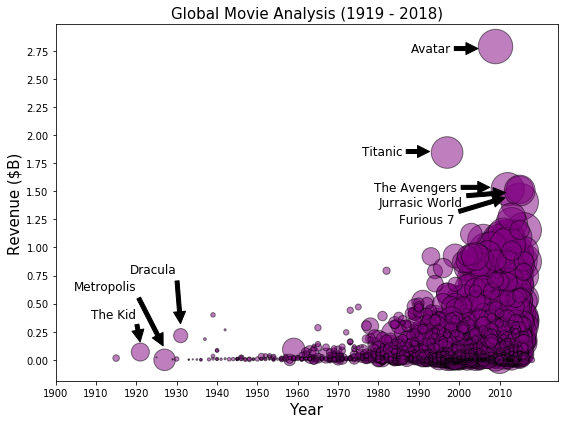

In [23]:
# budget_list = round(final_df['Budget'] / 1000000,1)
# print(budget_list.head())

# imdb_list = final_df['IMDB Rating'] * 50
# print(imdb_list.head())



budget_size = round(final_df['Budget'] / 1000000,1) * 5

final_df['Year'] = final_df['Year'].sort_values(ascending= False)

size = 12
fig1, ax1 = plt.subplots(figsize=(8, 6))

ax1.scatter(final_df['Year'], final_df['Revenue'] / 1000000000, 
            s= budget_size, color= "Purple", alpha= 0.50, edgecolor= "Black", linewidths= 1, label= "Urban")

ax1.annotate('Avatar', xy=(2005, 2.770), xytext=(1988, 2.770),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='center',
            size= size
            )

ax1.annotate('''Titanic''', xy=(1993, 1.854), xytext=(1976, 1.854),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='center',
            size= size
            )

ax1.annotate('The Avengers', xy=(2008, 1.535), xytext=(1979, 1.535),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='center',
            size= size
            )

ax1.annotate('Jurrasic World', xy=(2012, 1.49), xytext=(1980, 1.40),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='center',
            size= size
            )

ax1.annotate('Furious 7', xy=(2012, 1.45), xytext=(1985, 1.25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='center',
            size= size
            )

ax1.annotate('The Kid', xy=(1921, 0.15), xytext=(1920, 0.40),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right',
            verticalalignment='center',
            size= size
            )

ax1.annotate('Metropolis', xy=(1927, 0.10), xytext=(1920, 0.65),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right',
            verticalalignment='center',
            size= size
            )

ax1.annotate('Dracula', xy=(1931, 0.30), xytext=(1930, 0.80),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right',
            verticalalignment='center',
            size= size
            )

plt.title("Global Movie Analysis (1919 - 2018)", fontsize= 15)
plt.xlabel("Year", fontsize= 15)
plt.ylabel("Revenue ($B)", fontsize= 15)
plt.xticks(np.arange(1900, 2020, 10))
plt.yticks(np.arange(0,3.0, 0.25))
#plt.grid()

plt.tight_layout()
# plt.savefig("year_bubble.png", format='png', dpi=1200, pad_inches=0)
plt.show()

## Popularity Overtime 
Popularity is considered the average IMDB rating by year

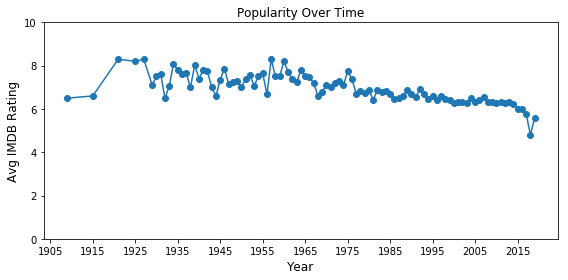

In [24]:
imdb_grp = final_df.groupby(['Year'])

avg_imdb = imdb_grp['IMDB Rating'].mean()
avg_imdb.head()

avg_imdb_df = pd.DataFrame({"Avg IMDB Rating" : avg_imdb})
avg_imdb_df

plt.figure(figsize= (8,4))
plt.scatter(avg_imdb_df.index.values, avg_imdb_df['Avg IMDB Rating'])

plt.plot(avg_imdb_df.index.values, avg_imdb_df['Avg IMDB Rating'])
plt.xticks(np.arange(1905, 2021, 10))
plt.yticks(np.arange(0, 11, 2))
plt.title("Popularity Over Time")
plt.ylabel("Avg IMDB Rating", fontsize= 12)
plt.xlabel("Year", fontsize= 12)
plt.tight_layout()
# plt.savefig("popularity_ovr_time.png", format='png', dpi=1200, pad_inches=0)
plt.show()

## Budget Over Time
Plotting increase/decrease of Budget over Years

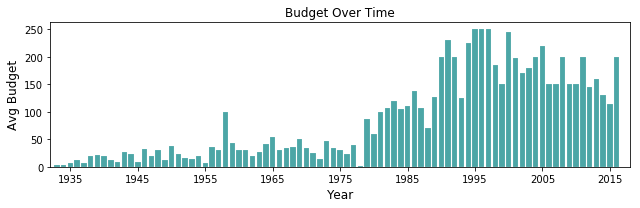

In [25]:
imdb_grp = final_df.groupby(['Year'])

avg_budget = imdb_grp['Budget'].median()
avg_budget.head()

avg_budget_df = pd.DataFrame({"Avg Budget" : avg_budget})
avg_budget_df

avg_budget_df = avg_budget_df.loc[1932:]
test_df = pd.DataFrame(avg_budget_df)


plt.figure(figsize= (9,3))
plt.bar(avg_budget_df.index.values, test_df['Avg Budget'] / 100000,
         align= "center", 
         color= "teal", 
         alpha= 0.70, 
         edgecolor= "white",
         linewidth= .2,
        )


y_bottom, y_top = plt.ylim()  # return the current ylim
plt.ylim((y_bottom, y_top))
plt.yticks(np.arange(y_bottom, y_top, 50))

x_bottom, x_top = plt.xlim()  # return the current ylim
plt.xlim((1932, 2018))
plt.xticks(np.arange(1935, 2017, 10))


plt.title("Budget Over Time")
plt.ylabel("Avg Budget", fontsize= 12)
plt.xlabel("Year", fontsize= 12)
plt.tight_layout()
# plt.savefig("budget_ovr_time.png", format='png', dpi=1200, pad_inches=0)
plt.show()

## Top 20 Movies (Revenue)
Top 20 movies based on Revenue with Budget overlay

In [26]:
# Sorting Top 20
rev_sort = final_df.sort_values(['Revenue'], ascending= False)


rev_sort_df = pd.DataFrame(rev_sort)
rev_sort_df.reset_index(drop= True)

rev_sort_df = rev_sort_df[0:20]
rev_sort_df.head()

,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,Awards,IMDB Rating,Revenue,Budget
0,Avatar,2009,PG-13,162,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"English, Spanish","UK, USA",Won 3 Oscars. Another 85 wins & 128 nominations.,7.8,2787965087,237000000
25,Titanic,1997,PG-13,194,"Drama, Romance",James Cameron,James Cameron,"English, Swedish, Italian",USA,Won 11 Oscars. Another 111 wins & 77 nominations.,7.8,1845034188,200000000
16,The Avengers,2012,PG-13,143,"Action, Adventure, Sci-Fi",Joss Whedon,"Joss Whedon (screenplay), Zak Penn (story), Jo...","English, Russian, Hindi",USA,Nominated for 1 Oscar. Another 38 wins & 79 no...,8.1,1519557910,220000000
28,Jurassic World,2015,PG-13,124,"Action, Adventure, Sci-Fi",Colin Trevorrow,"Rick Jaffa (screenplay by), Amanda Silver (scr...",English,USA,14 wins & 57 nominations.,7.0,1513528810,150000000
43,Furious 7,2015,PG-13,137,"Action, Adventure, Thriller",James Wan,"Chris Morgan, Gary Scott Thompson (characters)","English, Thai, Arabic, Spanish","USA, China, Japan, Canada, United Arab Emirates",Nominated for 1 Golden Globe. Another 28 wins ...,7.2,1506249360,190000000


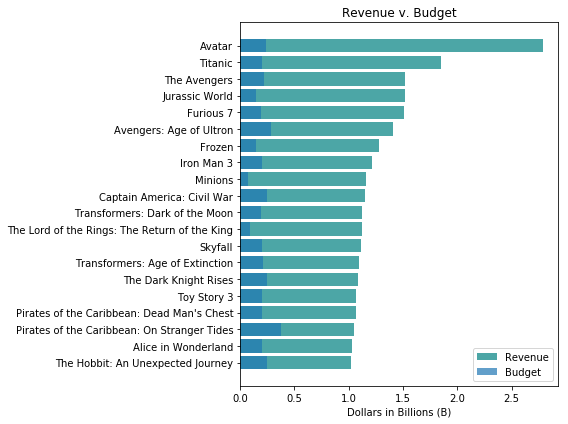

In [28]:
# Charting Top 20 as horizontal bar graph

plt.figure(figsize= (8,6))
ax1 = plt.barh(rev_sort_df['Title'],
               rev_sort_df['Revenue'] / 1000000000,
               height = 0.8,
               color = "teal",
               alpha = 0.7,
               align = "center"
              )

ax2 = plt.barh(rev_sort_df['Title'],
               rev_sort_df['Budget'] / 1000000000,
               height = 0.8,
               #color = "",
               alpha = 0.7,
               align = "center"
              )


plt.legend((ax1[0], ax2[0]), ('Revenue', 'Budget'), loc = "best")
plt.title("Revenue v. Budget")
plt.xlabel("Dollars in Billions (B)")

plt.gca().invert_yaxis()
plt.tight_layout()
# plt.savefig("revenue_v_budget.png", format='png', dpi=1200, pad_inches=0)
plt.show()

In [29]:
final_df.describe(include = ['object', 'int', 'float'])

,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,Awards,IMDB Rating,Revenue,Budget
count,4582,4582.000000,4582,4582.000000,4582,4582,4582,4582,4582,4582,4582.000000,4.582000e+03,4.582000e+03
unique,4563,NaN,22,NaN,935,2338,4147,647,591,1429,NaN,NaN,NaN
top,Batman,NaN,R,NaN,Drama,Steven Spielberg,NA,English,USA,NA,NaN,NaN,NaN
freq,6,NaN,1974,NaN,200,26,44,2872,2714,634,NaN,NaN,NaN
mean,NaN,2002.058708,NaN,107.330642,NaN,NaN,NaN,NaN,NaN,NaN,6.417481,8.438551e+07,2.962052e+07
std,NaN,12.996240,NaN,21.518008,NaN,NaN,NaN,NaN,NaN,NaN,1.114829,1.649530e+08,4.107635e+07
min,NaN,1909.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00
25%,NaN,1999.000000,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.800000,0.000000e+00,1.000000e+06
50%,NaN,2005.000000,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.500000,2.030899e+07,1.500000e+07
75%,NaN,2010.000000,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.200000,9.570559e+07,4.000000e+07


## Frequency World Clouds
Generating frequency visualizations in the the form of word clouds
* Title - Shows the commonality among the words used as movie titles
* Genre - Displays the most prevalent Genres in the data set
* Country - Displays the countries where the movies were filmed 
* Language - Displays the frequency of languages that are spoken in the movies
* MPAA Rating - Displays the most prevalent MPAA ratings used in the data set

In [33]:
# Define function to fill transparent background with white
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

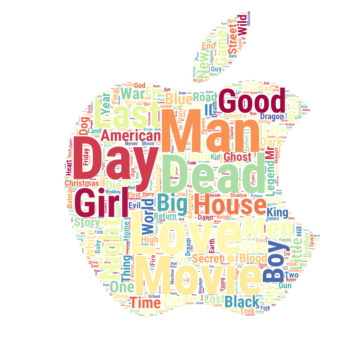

In [36]:
%matplotlib inline

apple_mask = np.array(Image.open("wc_masks/fa_apple.png"))


# Transform transparent image with white background
transformed_apple_mask = np.ndarray((apple_mask.shape[0],apple_mask.shape[1]), np.int32)
for i in range(len(apple_mask)):
    transformed_apple_mask[i] = list(map(transform_format, apple_mask[i]))
    

movies_text = final_df.Title
movies_text = " ".join(movie for movie in movies_text)

# Generate a word cloud image
font_path = 'wc_fonts/RobotoCondensed-Bold.ttf'
wordcloud_movie = WordCloud(
    width = 1000,
    height = 1000,
    max_words = 4000,
    max_font_size = 200,
    font_step = 1,
    collocations = False, 
    background_color="white", 
    mode = 'RGBA',
    colormap = "Spectral",
    font_path = font_path,
    random_state = 1,
    repeat = True,
    mask=transformed_apple_mask   
    ).generate(movies_text)

# create coloring from image
#image_colors = ImageColorGenerator(ru_mask)

plt.figure(figsize=[5,5])
plt.imshow(wordcloud_movie, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
# plt.savefig("movie_title_wc.png", format='png', dpi=1200, bbox_inches='tight', pad_inches=0)
plt.show()

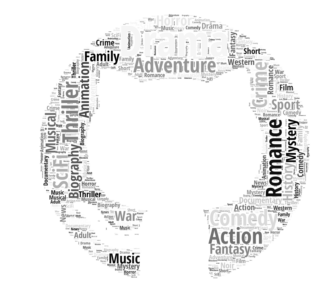

In [37]:
%matplotlib inline

git_mask = np.array(Image.open("wc_masks/fa_github.png"))


# Transform transparent image with white background
transformed_git_mask = np.ndarray((git_mask.shape[0],git_mask.shape[1]), np.int32)
for i in range(len(git_mask)):
    transformed_git_mask[i] = list(map(transform_format, git_mask[i]))
    

genre_text = final_df.Genre
genre_text = " ".join(genre for genre in genre_text)
genre_text = genre_text.replace('Sci-Fi', 'SciFi')

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(10, 50)

# Generate a word cloud image
font_path = 'wc_fonts/OpenSansCondensed-Bold.ttf'
wordcloud_genre = WordCloud(
    width = 1000,
    height = 1000,
    max_words = 4000,
    max_font_size = 200,
    font_step = 1,
    collocations = False, 
    background_color="white", 
    mode = 'RGBA',
    colormap = "Greys",
    font_path = font_path,
    random_state = 2,
    repeat = True,
    mask=transformed_git_mask,   
    ).generate(genre_text)

plt.figure(figsize=[5,5])
plt.imshow(wordcloud_genre, interpolation="bilinear")
plt.axis("off")
# plt.savefig("genre_wc.png", format='png', dpi=1200, bbox_inches='tight', pad_inches=0)
plt.show()

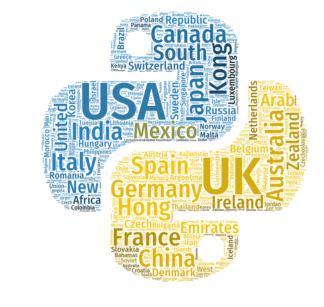

In [38]:
%matplotlib inline

python_mask = np.array(Image.open("wc_masks/devicons_python.png"))
color_mask = np.array(Image.open('wc_masks/devicon_python_color.png'))

# Transform transparent image with white background
transformed_python_mask = np.ndarray((python_mask.shape[0],python_mask.shape[1]), np.int32)
for i in range(len(python_mask)):
    transformed_python_mask[i] = list(map(transform_format, python_mask[i]))
    

country_text = final_df.Country
country_text = " ".join(country for country in country_text)

# Generate a word cloud image
font_path = 'wc_fonts/FiraSansCondensed-Medium.ttf'
wordcloud_country = WordCloud(
    max_words = 4000,
    max_font_size = 200,
    font_step = 1,
    collocations = False, 
    background_color="white", 
    mode = 'RGBA',
    font_path = font_path,
    random_state = 1,
    repeat = True,
    mask=transformed_python_mask,   
    ).generate(country_text)

# create coloring from image
image_colors = ImageColorGenerator(color_mask)


plt.figure(figsize=[5,5])
wordcloud_country.recolor(color_func=image_colors)
plt.imshow(wordcloud_country, interpolation="bilinear")
plt.axis("off")

# plt.savefig("country_wc.png", format='png', dpi=1200, bbox_inches='tight', pad_inches=0)
plt.show()

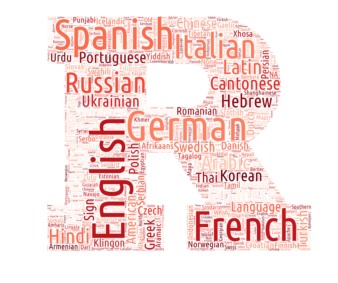

In [39]:
ru_mask = np.array(Image.open("wc_masks/RUlrg.png"))

lang_text = final_df.Language
lang_text = " ".join(lang for lang in lang_text)

# Generate a word cloud image
font_path = 'wc_fonts/UbuntuCondensed-Regular.ttf'
wordcloud_lang = WordCloud(
    max_words = 4000,
    max_font_size = 200,
    font_step = 1,
    collocations = False, 
    background_color= "white", 
    mode = 'RGBA',
    colormap = "Reds",
    font_path = font_path,
    random_state = 1,
    repeat = True,
    mask=ru_mask,   
    ).generate(lang_text)

%matplotlib inline

plt.figure(figsize=[5,5])
plt.imshow(wordcloud_lang, interpolation="bilinear")
plt.axis("off")

# plt.savefig("language_wc.png", format='png', dpi=1200, bbox_inches='tight', pad_inches=0)
plt.show()

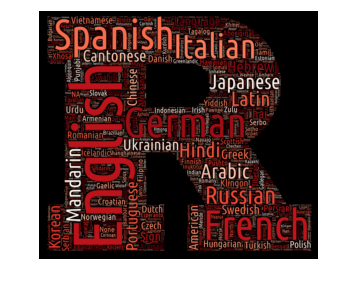

In [40]:
ru_mask = np.array(Image.open("wc_masks/RUlrg.png"))

lang_text = final_df.Language
lang_text = " ".join(lang for lang in lang_text)

# Generate a word cloud image
font_path = 'wc_fonts/UbuntuCondensed-Regular.ttf' #custom font package
wordcloud_lang = WordCloud(
    max_words = 4000,
    max_font_size = 300,
    font_step = 1,
    collocations = False, 
    background_color="black", 
    mode = 'RGBA',
    colormap = "Reds",
    font_path = font_path,
    random_state = 1,
    repeat = True,
    mask=ru_mask,   
    ).generate(lang_text)

%matplotlib inline

plt.figure(figsize=[5,5])
plt.imshow(wordcloud_lang, interpolation="bilinear")
plt.axis("off")

# plt.savefig("language_blk_wc.png", format='png', dpi=1200, bbox_inches='tight', pad_inches=0)
plt.show()

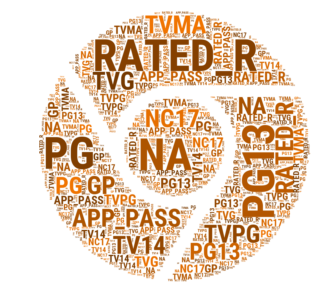

In [42]:
%matplotlib inline

chrome_mask = np.array(Image.open("wc_masks/devicons_chrome.png"))

# Transform transparent image with white background
transformed_chrome_mask = np.ndarray((chrome_mask.shape[0],chrome_mask.shape[1]), np.int32)
for i in range(len(chrome_mask)):
    transformed_chrome_mask[i] = list(map(transform_format, chrome_mask[i]))

# Create a function to change color hue starting from orange (21)
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 21.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)


rated_text = final_df.Rated
rated_text = " ".join(rated for rated in rated_text)
rated_text = rated_text.replace('PG-13', 'PG13')
rated_text = rated_text.replace('NC-17', 'NC17')
rated_text = rated_text.replace('TV-MA', 'TVMA')
rated_text = rated_text.replace('TV-14', 'TV14')
rated_text = rated_text.replace('TV-G', 'TVG')
rated_text = rated_text.replace('TV-PG', 'TVPG')
rated_text = rated_text.replace('NOT RATED', 'NA')
rated_text = rated_text.replace('Unrated', 'NA')
rated_text = rated_text.replace('Not Rated', 'NA')
rated_text = rated_text.replace('UNRATED', 'NA')
rated_text = rated_text.replace('APPROVED', 'APP_PASS')
rated_text = rated_text.replace('Approved', 'APP_PASS')
rated_text = rated_text.replace('Passed', 'APP_PASS')
rated_text = rated_text.replace('PASSED', 'APP_PASS')
rated_text = rated_text.replace('R', 'RATED_R')

# Generate a word cloud image
font_path = 'wc_fonts/RobotoCondensed-Bold.ttf'
wordcloud_rated = WordCloud(
    max_words = 1000,
    max_font_size = 200,
    font_step = 1,
    collocations = False, 
    background_color="white", 
    mode = 'RGBA',
#     colormap = "Accent",
    color_func = random_color_func, 
    font_path = font_path,
    random_state = 1,
    repeat = True,
    mask = transformed_chrome_mask,
    ).generate(rated_text)

plt.figure(figsize=[5,5])
plt.imshow(wordcloud_rated, interpolation="bilinear")
plt.axis("off")

# plt.savefig("output_images/rated_wc.png", format='png', dpi=1200, bbox_inches='tight', pad_inches=0)
plt.show()

## Language and Country Analysis

In [43]:
# File to Load 
moviedata = pd.read_csv("moviesapi_clean.csv")
moviedata.head()
awarddata = pd.read_csv("moviesapi.csv")

In [44]:
moviedata.columns

Index(['Title', 'Year', 'Rated', 'Runtime', 'Genre', 'Director', 'Writer',
       'Language', 'Country', 'Awards', 'IMDB Rating', 'Revenue', 'Budget'],
      dtype='object')

In [45]:
moviedata["Language"].dtype

dtype('O')

In [61]:
#Languages
#The IMDb languages section records the languages spoken in titles in the database

#Create dataframe to store languages spoken in movie dataset
language_df = pd.DataFrame({'Title' : moviedata['Title'],
                           'Language': moviedata['Language']})

# function to convert a string to a list
def Convert(string): 
    li = list(string.split(",")) 
    return li 

# Check the how language is returned for one movie
#avatar_language = language_df.loc[0, "Language"]
#print(avatar_language)
#Convert(avatar_language)


# list to hold all languages contained in dataset
l = []
for languages in moviedata['Language']:
    #print(languages)
    title_language_list = (Convert(str(languages)))
    for individual_language in title_language_list:
        if individual_language != "nan":
            l.append(individual_language.strip())

        
#Create second dataframe to store and sort all languages spoken in movie dataset
language_df2 = pd.DataFrame({'Language':l})



grouped_language_df2 = language_df2.groupby(["Language"])
language_count = grouped_language_df2["Language"].count()
movie_total = len(moviedata["Title"])
l_percentage = round(((language_count/movie_total)*100), 2)


# Convert to DataFrame
language_df3 = pd.DataFrame({"Language Count":language_count, "Percent Total": l_percentage})
language_df3
language_df3 = language_df3.sort_values("Language Count", ascending=False)
language_df3

,Language Count,Percent Total
Language,,
English,4418,96.42
Spanish,473,10.32
French,449,9.80
German,263,5.74
Italian,203,4.43
Russian,187,4.08
Japanese,122,2.66
Mandarin,104,2.27
Arabic,100,2.18


<function matplotlib.pyplot.legend(*args, **kwargs)>

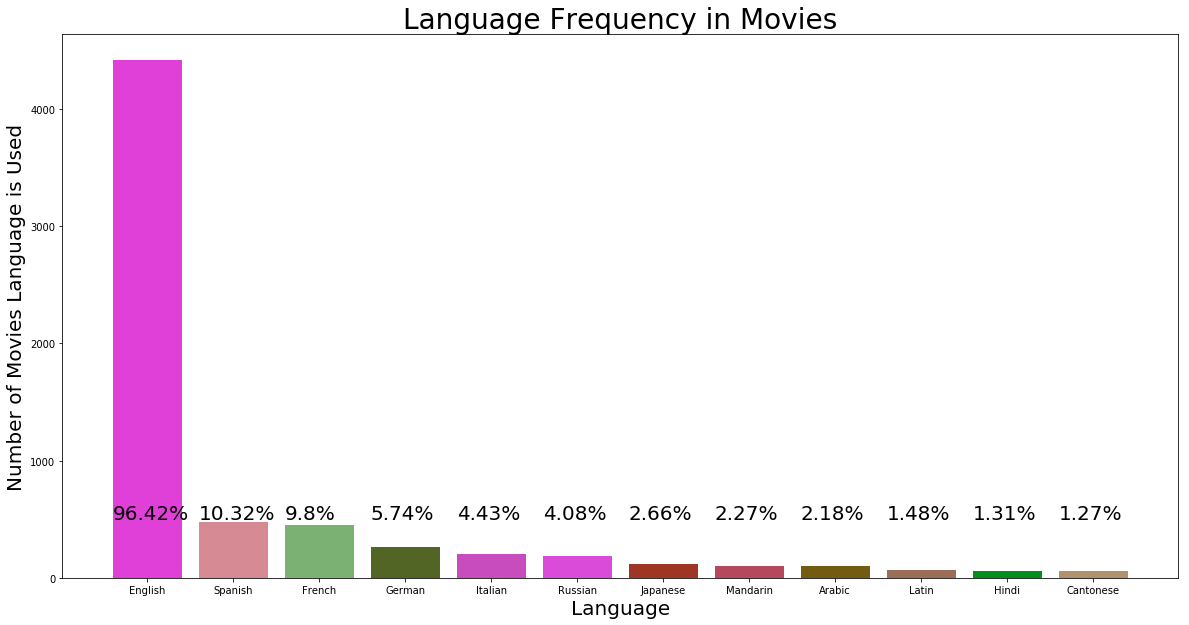

In [62]:
#Plot Bar Graph
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
import matplotlib.colors as colors



language_names = language_df3.index.values
x_axis = []
y_axis = []
label = []
colors_list = list(colors._colors_full_map.values())
color_counter = 25



for language_name in language_names:
    color_counter = color_counter + 5
    if language_df3.loc[language_name, "Percent Total"] > 1:
        x_axis.append(language_name)
        y_axis.append(language_df3.loc[language_name, "Language Count"])
        label.append((language_df3.loc[language_name,"Percent Total"]))

for j in range(len(x_axis)):
     ax.bar(x_axis[j], y_axis[j], color = colors_list[color_counter], align="center")
     color_counter = color_counter + 1
     label_percent = str(label[j]) + "%"
     ax.text(j-.4, 500, label_percent, style='normal', fontsize=20)


# Give the chart a title, x label, and y label
# Orient widths. Add labels, tick marks, etc. 
plt.title("Language Frequency in Movies", fontsize=28)
plt.xlabel("Language", fontsize=20)
plt.ylabel("Number of Movies Language is Used", fontsize=20)
plt.legend
#plt.ylim(0, 5000)




# Save the Figure
# fig.savefig("Language Frequency in Movies")

(0, 500)

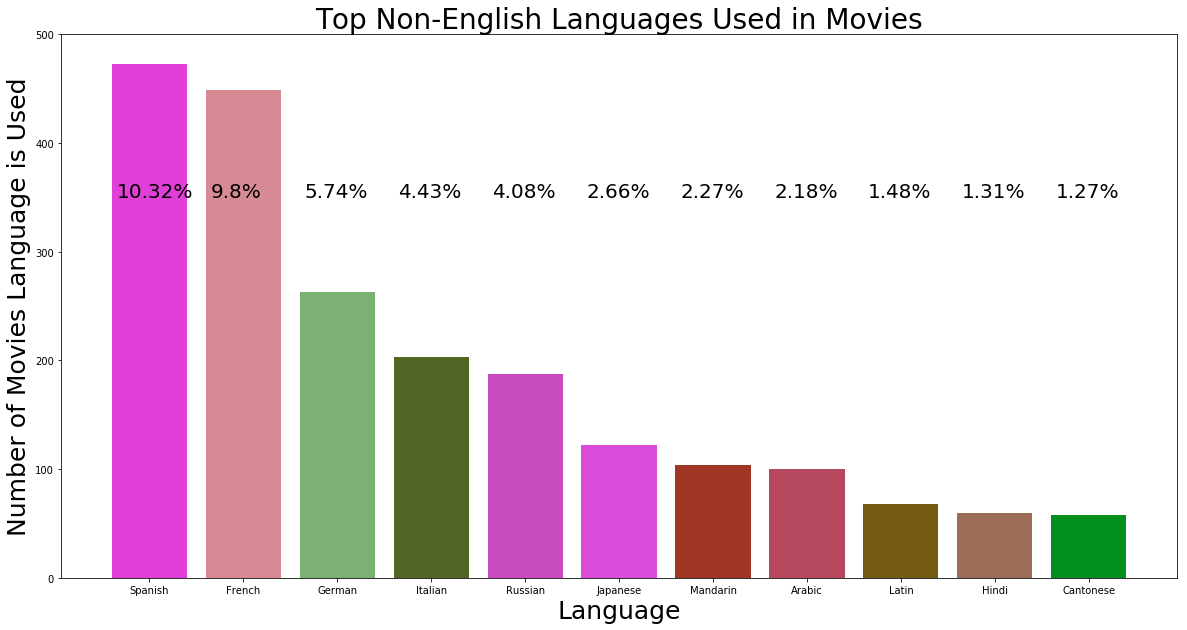

In [63]:
#Plot Bar Graph
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
import matplotlib.colors as colors



language_names = language_df3.index.values
x_axis = []
y_axis = []
label = []
colors_list = list(colors._colors_full_map.values())
color_counter = 25



for language_name in language_names:
    color_counter = color_counter + 5
    if language_df3.loc[language_name, "Percent Total"] > 1:
        x_axis.append(language_name)
        y_axis.append(language_df3.loc[language_name, "Language Count"])
        label.append((language_df3.loc[language_name,"Percent Total"]))


for j in range(1,len(x_axis)):
     ax.bar(x_axis[j], y_axis[j], color = colors_list[color_counter], align="center")
     color_counter = color_counter + 1
     label_percent = str(label[j]) + "%"
     ax.text(j-1.35, 350, label_percent, style='normal', fontsize=20)


# Give the chart a title, x label, and y label
# Orient widths. Add labels, tick marks, etc. 
plt.title("Top Non-English Languages Used in Movies", fontsize=28)
plt.xlabel("Language", fontsize=25)
plt.ylabel("Number of Movies Language is Used", fontsize=25)

plt.ylim(0, 500)




# Save the Figure
# fig.savefig("Top Non-English Languages Used in Movies")

In [64]:
#Number of Languages Used in Movies 
# list to hold number of languages used in each movie of the dataset 

lan = []
lan_num = []
for languages in moviedata['Language']:
    b = (Convert(str(languages)))
    lan.append(b)
    if b[0]!="nan":
        lan_num.append(len(b))
    else:
        lan_num.append(0)
        


languages_df4 = pd.DataFrame({"Title":moviedata["Title"], "Languages Spoken in Movie":lan, "Number of Languages Spoken in Movie":lan_num})


grouped_languages_df4 = languages_df4.groupby(["Number of Languages Spoken in Movie"])
grouped_languages_df4.count()
moviecount = grouped_languages_df4["Number of Languages Spoken in Movie"].count()

# Convert to DataFrame
languages_df5 = pd.DataFrame({"Number of Movies":moviecount})
languages_df5["Percent of Movies (%)"] = round((languages_df5["Number of Movies"] / movie_total)*100,2)
languages_df5 = languages_df5.sort_values("Percent of Movies (%)", ascending=False)
# Preview DataFrame
languages_df5

,Number of Movies,Percent of Movies (%)
Number of Languages Spoken in Movie,,
1,2982,65.08
2,928,20.25
3,384,8.38
4,159,3.47
5,79,1.72
6,26,0.57
0,7,0.15
8,6,0.13
7,5,0.11


Text(0.5, 1.0, 'Number of Languages Used in Movies')

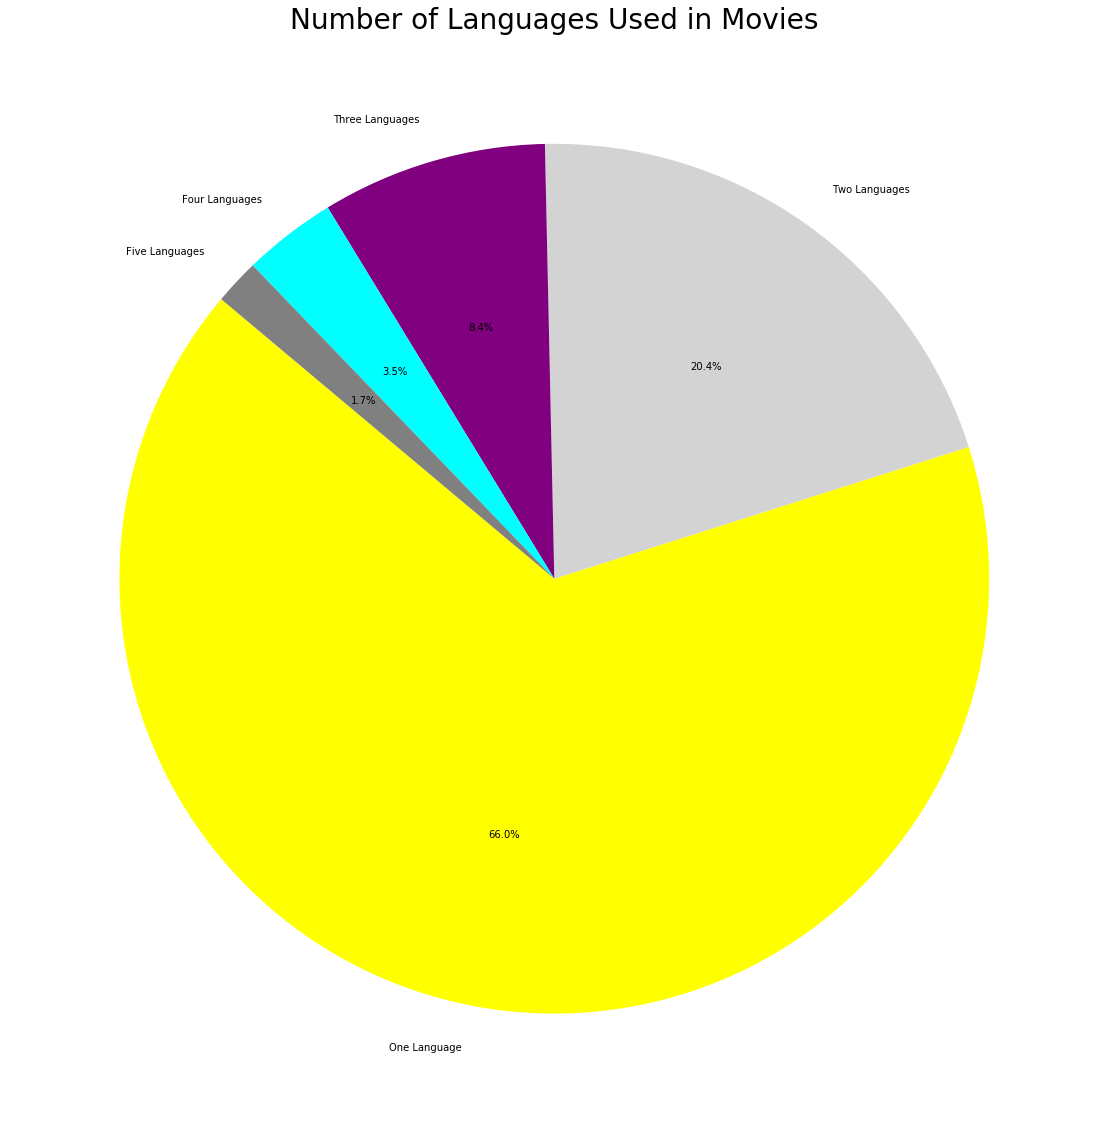

In [65]:
#Make Pie Chart
fig, ax = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(25)
languages_used = ["One Language", "Two Languages", "Three Languages", "Four Languages", "Five Languages"]
colors = ["yellow","lightgray","purple","cyan","gray"]
values = [3080, 954, 391, 162, 79]
plt.pie(values, labels= languages_used, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Number of Languages Used in Movies", fontsize=28)
# fig.savefig("Number of Languages Used in Movies")

In [66]:
#Countries
#IMDb defines the country of a title as the place or places where the production companies for that title are based
#and therefore where the financing originated. This means, for example, even if a title is shot on location in France, if its production companies are all based in the USA, we record the country as USA.

# If a title is a multi-country production, the order the countries are entered into the addition/update forms is significant and will be reflected in the display order within IMDb.

#Create dataframe to store the countries of the movies
country_df = pd.DataFrame({'Title' : moviedata['Title'],
                           'Country': moviedata['Country']})

country_list = []
for country in country_df["Country"]:
    country_language_list = (Convert((country)))
    for each_country in country_language_list:
        each_country_no_spaces= each_country.strip()
        country_list.append((str(each_country_no_spaces)))


#Create second dataframe to store and sort all languages spoken in movie dataset
country_df2 = pd.DataFrame({'Country':country_list})


grouped_country_df2 = country_df2.groupby(["Country"])
country_count = grouped_country_df2["Country"].count()


# Convert to DataFrame
country_df3 = pd.DataFrame({"Country Count":country_count})
country_df3 = country_df3.sort_values("Country Count", ascending=False)
country_df3.head()

,Country Count
Country,
USA,4020
UK,738
Germany,387
France,360
Canada,340


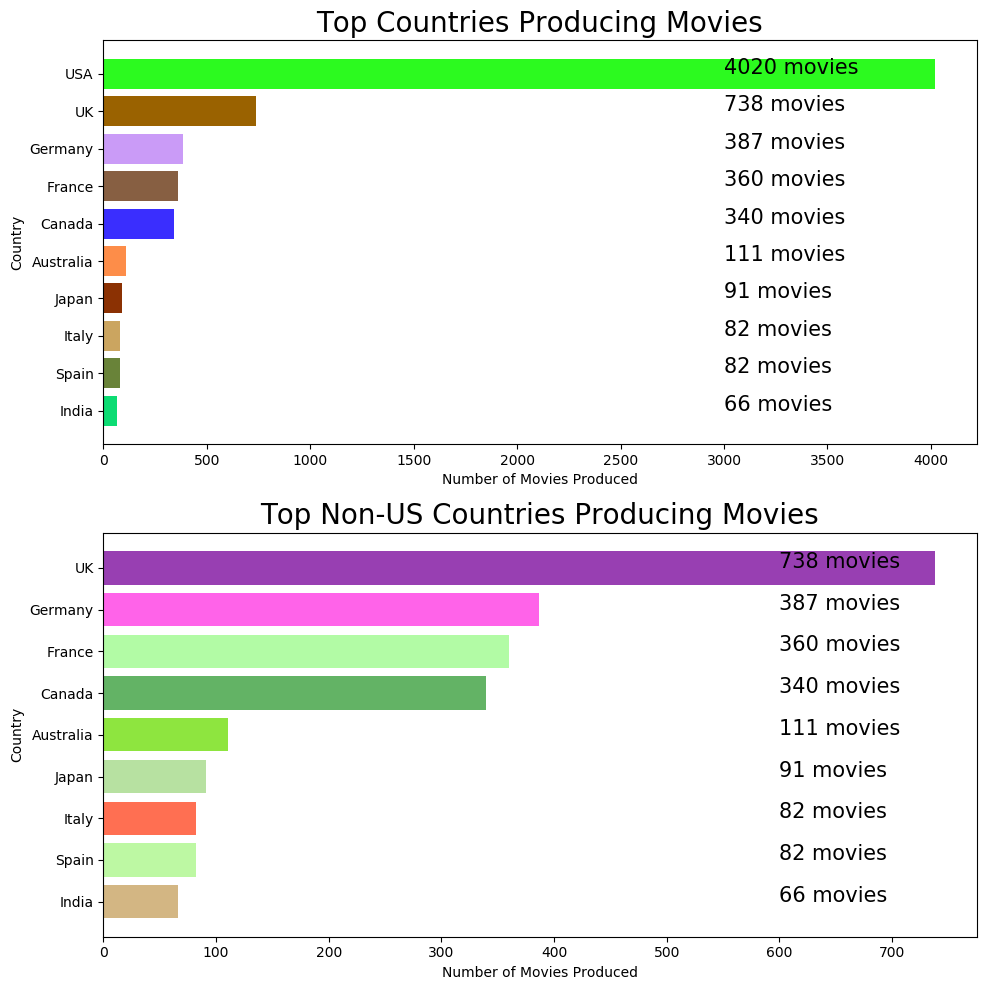

In [67]:
#Plot bar chart for country
fig, ax = plt.subplots(nrows = 2, ncols=1, figsize = (10,10), dpi=100)

import matplotlib.colors as colors

#fig.set_figheight(10)
#fig.set_figwidth(20)

country_names = country_df3.index.values
x1_axis = []
y1_axis = []
colors_list2 = list(colors._colors_full_map.values())
color_counter2 = 40
label2 = 0


for cn in range(10):
    color_counter2 = color_counter2 + 5
    x1_axis.append(country_names[cn])
    y1_axis.append(country_df3.loc[country_names[cn], "Country Count"])


#print(x1_axis)
#print(y1_axis)

for cn1 in range(len(x1_axis)):
     ax[0].barh(x1_axis[cn1], y1_axis[cn1], color = colors_list2[color_counter2], align="center")
     color_counter2 = color_counter2 + 1
     label3 = str(y1_axis[cn1])
     #print(label3)
     ax[0].text(3000, label2, label3 + " movies", style='normal', fontsize=15)
     label2 = label2 + 1
ax[0].invert_yaxis()
ax[0].set_title("Top Countries Producing Movies", fontsize=20)
ax[0].set_xlabel("Number of Movies Produced", fontsize=10)
ax[0].set_ylabel("Country", fontsize=10)



color_counter2 = 40
label2 = 0
for cn2 in range(1, len(x1_axis)):
     ax[1].barh(x1_axis[cn2], y1_axis[cn2], color = colors_list2[color_counter2], align="center")
     color_counter2 = color_counter2 + 1
     label3 = str(y1_axis[cn2])
     #print(label3)
     ax[1].text(600, label2, label3 + " movies", style='normal', fontsize=15)
     label2 = label2 + 1
ax[1].invert_yaxis()
ax[1].set_title("Top Non-US Countries Producing Movies", fontsize=20)
ax[1].set_xlabel("Number of Movies Produced", fontsize=10)
ax[1].set_ylabel("Country", fontsize=10)
plt.tight_layout()

# fig.savefig("Countries Producing Movies")

In [68]:
#Profit Dataframe with Awards
profit_df = pd.DataFrame({'Title' : moviedata['Title'],
                          'Year': moviedata['Year'],
                          'Rated': moviedata['Rated'],
                          'Runtime': moviedata['Runtime'],
                          'Genre': moviedata['Genre'],
                          'Director':moviedata['Director'],
                          'Writer':moviedata['Writer'],
                          'IMDB Rating': moviedata['IMDB Rating'],
                          'Revenue': moviedata['Revenue'],
                          'Budget': moviedata['Budget'],
                          'Country':moviedata['Country'],
                          'Language':moviedata['Language']})
profit_df

profit_df[['Budget','Revenue']] = profit_df[['Budget','Revenue']].replace(0,np.NAN)
profit_df.dropna(subset=['Budget', 'Revenue'], inplace=True)
profit_df['Profit'] = profit_df['Revenue']-profit_df['Budget']
profit_df['Profit'] = profit_df['Profit'].apply(np.int64)
profit_df
profit_df.reset_index(inplace = True, drop = True)
#profit_df.index.values
profit_df.head()

,Title,Year,Rated,Runtime,Genre,Director,Writer,IMDB Rating,Revenue,Budget,Country,Language,Profit
0,Avatar,2009,PG-13,162,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,7.8,2.787965e+09,237000000.0,"UK, USA","English, Spanish",2550965087
1,Pirates of the Caribbean: At World's End,2007,PG-13,169,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...",7.1,9.610000e+08,300000000.0,USA,"Mandarin, English",661000000
2,Spectre,2015,PG-13,148,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...",6.8,8.806746e+08,245000000.0,"UK, USA","English, Spanish, Italian, German, French",635674609
3,The Dark Knight Rises,2012,PG-13,164,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...",8.4,1.084939e+09,250000000.0,"UK, USA","English, Arabic",834939099
4,John Carter,2012,PG-13,132,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton (screenplay by), Mark Andrews (...",6.6,2.841391e+08,260000000.0,USA,English,24139100


In [69]:
#Writer Analysis

#Removes parenthetical information from the Writers column
writer_df = profit_df.copy()
writer_df['Writer'] = writer_df['Writer'].str.replace(r"\(.*\)","")
writer_df[['Writer']] = writer_df[['Writer']].replace("NA",np.NAN)
writer_df.dropna(subset=['Writer'], inplace=True)
writer_df.reset_index(inplace = True, drop = True)

#Removes duplicate from a list
def Remove(simplelist): 
    final_list = [] 
    for num in simplelist: 
        test = (num.strip())
        #print(test)
        if test not in final_list: 
            final_list.append(test) 
    return final_list 

writer_df

Writers2 = []
Writers2_Count = []
for i in writer_df.index.values:
    w = Remove(Convert(writer_df.iloc[i,6]))
    #print(w)
    Writers2.append(w)
    Writers2_Count.append(len(w))
    

writer_df
writer_df["Writers2"] = (Writers2)
writer_df["Writers2 Count"] = Writers2_Count
del writer_df["Writer"]
writer_df

grouped_writer_df = writer_df.groupby(["Writers2 Count"])
sum_writers_count = grouped_writer_df["Writers2 Count"].count()
sum_writers_count 
profit_writers_count = grouped_writer_df["Profit"].sum()
profit_writers_count
average_IMDB_rating = grouped_writer_df["IMDB Rating"].mean()
average_IMDB_rating
writer_df2 = pd.DataFrame({"Number of Movies":sum_writers_count, "Profit":profit_writers_count, "Average IMDB Rating":average_IMDB_rating})
writer_df2.head()


#nine = writer_df.loc[writer_df["Writers2 Count"] == 9, :]
#print(nine)

,Number of Movies,Profit,Average IMDB Rating
Writers2 Count,,,
1,2392,196527690398,6.634950
2,491,37042492100,6.384114
3,167,15831032166,6.219162
4,38,4960412941,6.178947
5,10,644815422,5.980000


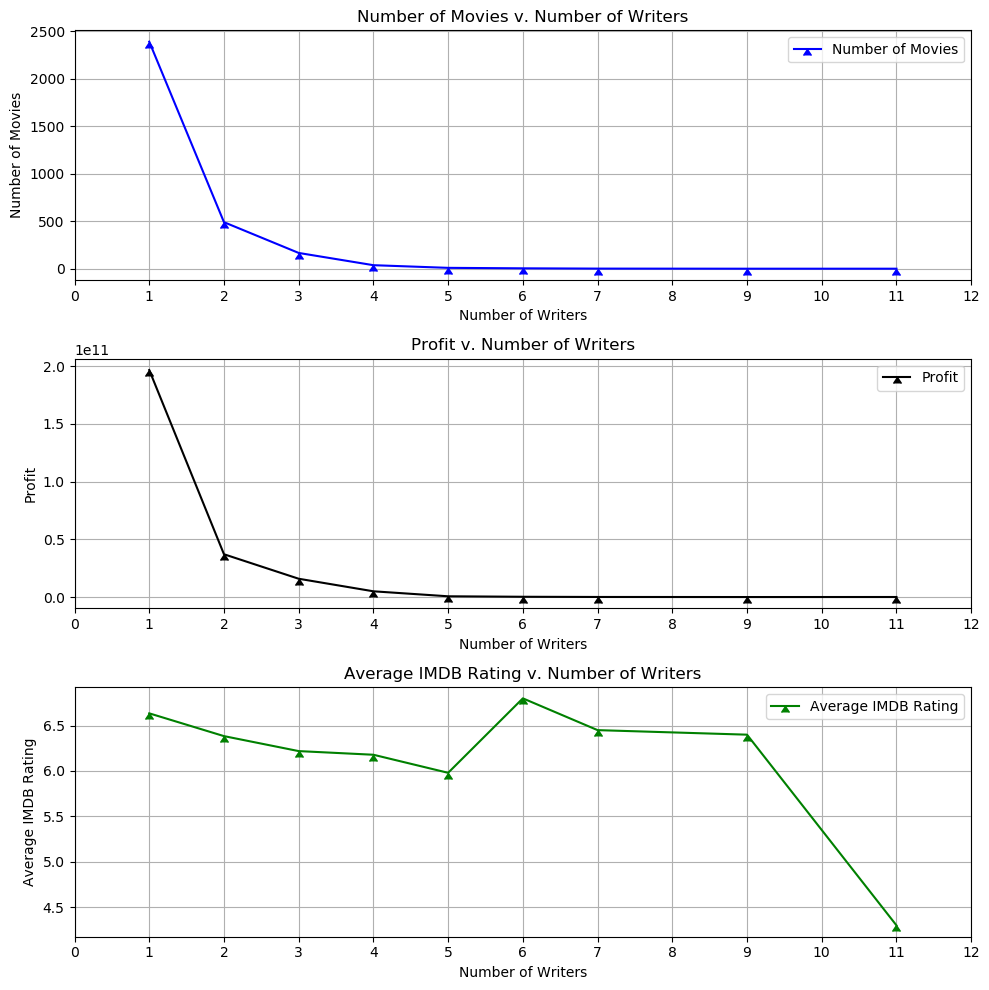

In [70]:
#Plot Charts for Number of Writers
fig, ax = plt.subplots(nrows = 3, ncols=1, figsize = (10,10), dpi=100)
x3 = writer_df2.index.values
y3 = writer_df2["Number of Movies"]
z3 = writer_df2["Profit"]
w3 = writer_df2["Average IMDB Rating"]

ax[1].plot(x3, z3, color="black", label="Profit", marker=6)

ax[1].set_xlim(0,12,1)
ax[1].grid(True)
ax[1].legend
ax[1].legend(loc="upper right")
ax[1].set_title("Profit v. Number of Writers")
ax[1].set_xlabel("Number of Writers")
ax[1].set_ylabel("Profit")
ax[1].set_xticks(np.arange(0, 13, 1.0))


ax[0].plot(x3, y3, color="blue", label="Number of Movies", marker=6)
ax[0].set_xlim(0,12,1)
ax[0].grid(True)
ax[0].legend
ax[0].legend(loc="upper right")
ax[0].set_title("Number of Movies v. Number of Writers")
ax[0].set_xlabel("Number of Writers")
ax[0].set_ylabel("Number of Movies")
ax[0].set_xticks(np.arange(0, 13, 1.0))

ax[2].plot(x3, w3, color="green", marker=6)
ax[2].set_xlim(0,12,1)
ax[2].grid(True)
ax[2].legend
ax[2].legend(loc="upper right")
ax[2].set_title("Average IMDB Rating v. Number of Writers")
ax[2].set_xlabel("Number of Writers")
ax[2].set_ylabel("Average IMDB Rating")
ax[2].set_xticks(np.arange(0, 13, 1.0))

plt.tight_layout()

# fig.savefig("Profit v. Number of Writers.png")

In [71]:
#Oscars Analysis 
oscars_df = profit_df.copy()
oscars_df

awarddata.columns
get_oscars = pd.DataFrame({"Title":awarddata['Title'], "Awards":awarddata['Awards'], "Language":awarddata["Language"], "Country":awarddata["Country"], "IMDB Rating":awarddata["IMDB Rating"], "Director":awarddata["Director"]})
get_oscars
get_oscars.dropna(how='any', inplace=True)
get_oscars

get_oscars
only_oscars = get_oscars[get_oscars['Awards'].str.contains("Oscar")]
only_oscars
only_oscars_winners = only_oscars[only_oscars['Awards'].str.contains("Won")]
only_oscars_winners.reset_index(inplace = True, drop = True)
only_oscars_winners
oscar_count = []
for o in only_oscars_winners.index.values:
    oscar_count.append(int(only_oscars_winners["Awards"][o].split()[1]))
oscar_count
only_oscars_winners.insert(2, "Oscar Count", oscar_count, True) 
only_oscars_winners
only_oscars_winners.set_index("Title", inplace=True, drop=True)
only_oscars_winners
#oscars_df

only_oscars_winners = only_oscars_winners.sort_values("Oscar Count", ascending=False)
only_oscars_winners

#Count Number of languages
lan7 = []
lan_num7 = []
for languages in only_oscars_winners['Language']:
    c = (Convert(str(languages)))
    lan.append(c)
    if c[0]!="nan":
        lan_num7.append(len(c))
    else:
        lan_num.append(0)

only_oscars_winners["Language Count"] = lan_num7

only_oscars_winners

#Count Number of COuntries
con7 = []
con_num7 = []
for countries in only_oscars_winners['Country']:
    c1 = (Convert(str(countries)))
    con7.append(c1)
    if c1[0]!="nan":
        con_num7.append(len(c1))
    else:
        con_num7.append(0)

only_oscars_winners["Country Count"] = con_num7

only_oscars_winners

only_oscars_winners = only_oscars_winners[["Awards","Oscar Count", "Language", "Language Count", "Country", "Country Count", "IMDB Rating", "Director"]]
only_oscars_winners.head()

,Awards,Oscar Count,Language,Language Count,Country,Country Count,IMDB Rating,Director
Title,,,,,,,,
Ben-Hur,Won 11 Oscars. Another 17 wins & 13 nominations.,11,English,1,USA,1,8.1,William Wyler
The Lord of the Rings: The Return of the King,Won 11 Oscars. Another 197 wins & 122 nominati...,11,"English, Quenya, Old English, Sindarin",4,"New Zealand, USA",2,8.9,Peter Jackson
Titanic,Won 11 Oscars. Another 111 wins & 77 nominations.,11,"English, Swedish, Italian",3,USA,1,7.8,James Cameron
West Side Story,Won 10 Oscars. Another 18 wins & 11 nominations.,10,"English, Spanish",2,USA,1,7.6,"Jerome Robbins, Robert Wise"
The English Patient,Won 9 Oscars. Another 53 wins & 75 nominations.,9,"English, German, Italian, Arabic",4,"USA, UK",2,7.4,Anthony Minghella


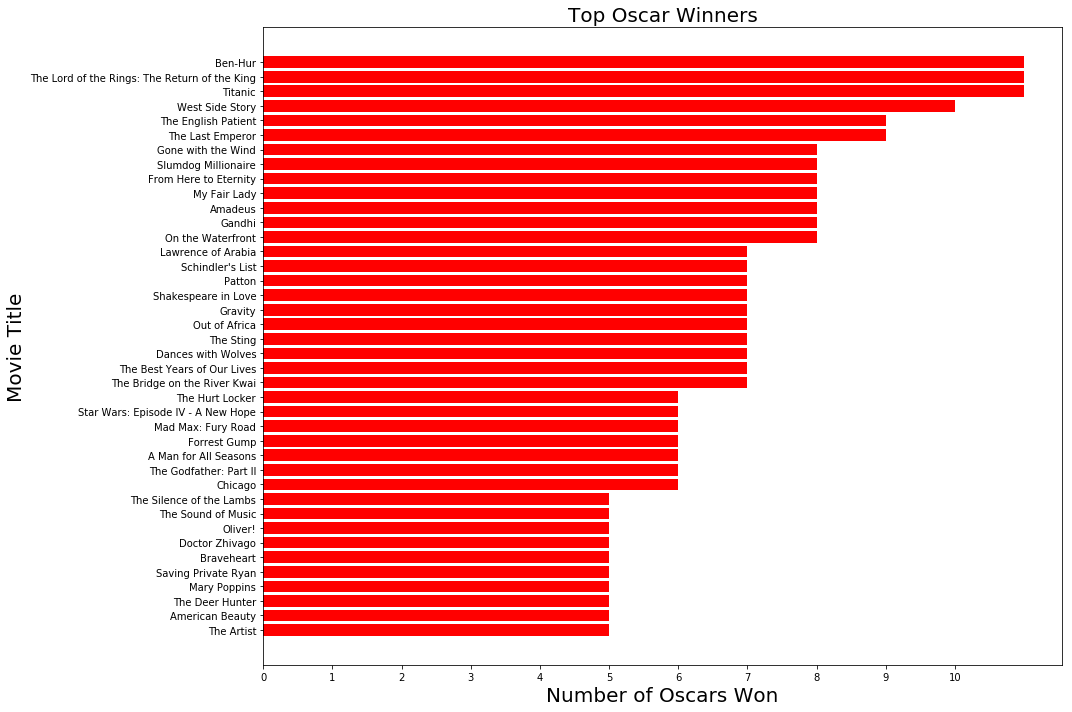

In [72]:
#Plot bar chart for oscars
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
import matplotlib.colors as colors

x = only_oscars_winners.index.values.tolist()
y = only_oscars_winners["Oscar Count"].tolist()
x1_axis = x[:40]
y1_axis = y[:40]
ax.barh(x1_axis,y1_axis, color = "red", align="center")
ax.invert_yaxis()
ax.set_title("Top Oscar Winners", fontsize=20)
ax.set_xlabel("Number of Oscars Won", fontsize=20)
ax.set_ylabel("Movie Title", fontsize=20)
ax.set_xticks(np.arange(0, 11, 1.0))
plt.tight_layout()

# fig.savefig("Top Oscar Winners")

In [73]:
#Grouping
grouped_only_oscars_winners_imdb = only_oscars_winners.groupby(["Oscar Count"])
grp_imdb = grouped_only_oscars_winners_imdb["IMDB Rating"].mean()
grp_imdb.head()
grp_imdb2 = pd.DataFrame({"Average IMDB Rating":grp_imdb})
grp_imdb2.head()
only_oscars_winners40 = only_oscars_winners.head(40)
only_oscars_winners40
grouped_only_oscars_winners_language40 = only_oscars_winners40.groupby(["Oscar Count"])
grp_language = grouped_only_oscars_winners_language40["Language Count"].mean()
grp_language
print(f' average language count in top 40 is {only_oscars_winners40["Language Count"].mean()}')
print(f' average country count in top 40 is {only_oscars_winners40["Country Count"].mean()}')

 average language count in top 40 is 2.425
 average country count in top 40 is 1.625


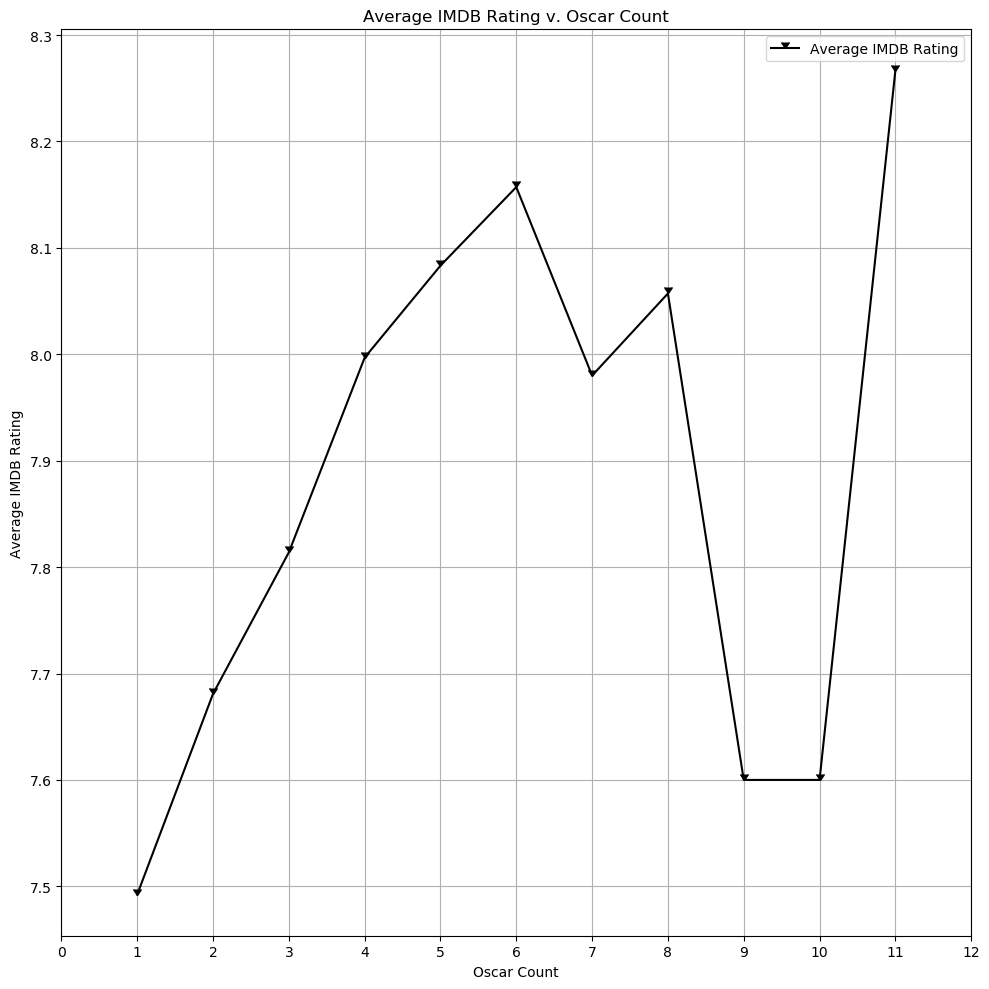

In [74]:
#Plot Charts for Number of Writers
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize = (10,10), dpi=100)
x3 = grp_imdb2.index.values
y3 = grp_imdb2["Average IMDB Rating"]




ax.plot(x3, y3, color="black", marker=7)


ax.set_xlim(0,9,1)
ax.grid(True)
ax.legend
ax.legend(loc="upper right")
ax.set_title("Average IMDB Rating v. Oscar Count")
ax.set_xlabel("Oscar Count")
ax.set_ylabel("Average IMDB Rating")
ax.set_xticks(np.arange(0, 13, 1.0))



plt.tight_layout()

# fig.savefig("Average IMDB Rating v. Oscar Count.png")

In [75]:
p_moviedata = pd.read_csv("moviesapi_clean.csv")
p_moviedata.head()

,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,Awards,IMDB Rating,Revenue,Budget
0,Avatar,2009,PG-13,162,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"English, Spanish","UK, USA",Won 3 Oscars. Another 85 wins & 128 nominations.,7.8,2787965087,237000000
1,Pirates of the Caribbean: At World's End,2007,PG-13,169,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...","Mandarin, English",USA,Nominated for 2 Oscars. Another 20 wins & 44 n...,7.1,961000000,300000000
2,Spectre,2015,PG-13,148,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","English, Spanish, Italian, German, French","UK, USA",Won 1 Oscar. Another 7 wins & 32 nominations.,6.8,880674609,245000000
3,The Dark Knight Rises,2012,PG-13,164,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Arabic","UK, USA",Nominated for 1 BAFTA Film Award. Another 38 w...,8.4,1084939099,250000000
4,John Carter,2012,PG-13,132,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton (screenplay by), Mark Andrews (...",English,USA,2 wins & 8 nominations.,6.6,284139100,260000000


## By Decade Analysis

In [76]:
# Create the bins in which Decade Data will be held
bins = [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990, 2000,2010, 2020]

# Create the names for the four bins
group_names = ["1900-10","1910-20","1920-30","1930-40", "1940-50", "1950-60","1960-70", "1970-80", "1980-90", "1990-2000", "2000-2010","2010-2020"]

In [77]:
#Creating bins of Decade
p_moviedata["Decade"] = pd.cut(p_moviedata["Year"], bins, labels=group_names)
p_moviedata["Decade"].head()

0    2000-2010
1    2000-2010
2    2010-2020
3    2010-2020
4    2010-2020
Name: Decade, dtype: category
Categories (12, object): [1900-10 < 1910-20 < 1920-30 < 1930-40 ... 1980-90 < 1990-2000 < 2000-2010 < 2010-2020]

In [78]:
p_moviedata['Profit']=p_moviedata['Revenue']-p_moviedata['Budget']

In [79]:
bin_df2 = p_moviedata.groupby("Decade")

#p=bin_df2.max()
#p
bin_max=bin_df2 ["Profit","Budget"]
bin_max.max()

,Profit,Budget
Decade,,
1900-10,0,0
1910-20,7361566,8500000
1920-30,21755000,92620000
1930-40,396176459,40000000
1940-50,266589150,6000000
1950-60,32000000,100000000
1960-70,278014286,45000000
1970-80,463654000,55000000
1980-90,782410554,144000000


In [80]:
# Average Revenue Per Decade
year_sum = p_moviedata.groupby('Decade')
count_year1 = bin_df2 ["Revenue"].mean()
count_year1

#t=bin_df2.agg({"Revenue": "sum"})

Decade
1900-10      0.000000e+00
1910-20      1.586157e+07
1920-30      1.495835e+07
1930-40      5.021574e+07
1940-50      1.741495e+07
1950-60      1.582725e+07
1960-70      3.051928e+07
1970-80      5.197838e+07
1980-90      7.228688e+07
1990-2000    7.621092e+07
2000-2010    8.055655e+07
2010-2020    1.124209e+08
Name: Revenue, dtype: float64

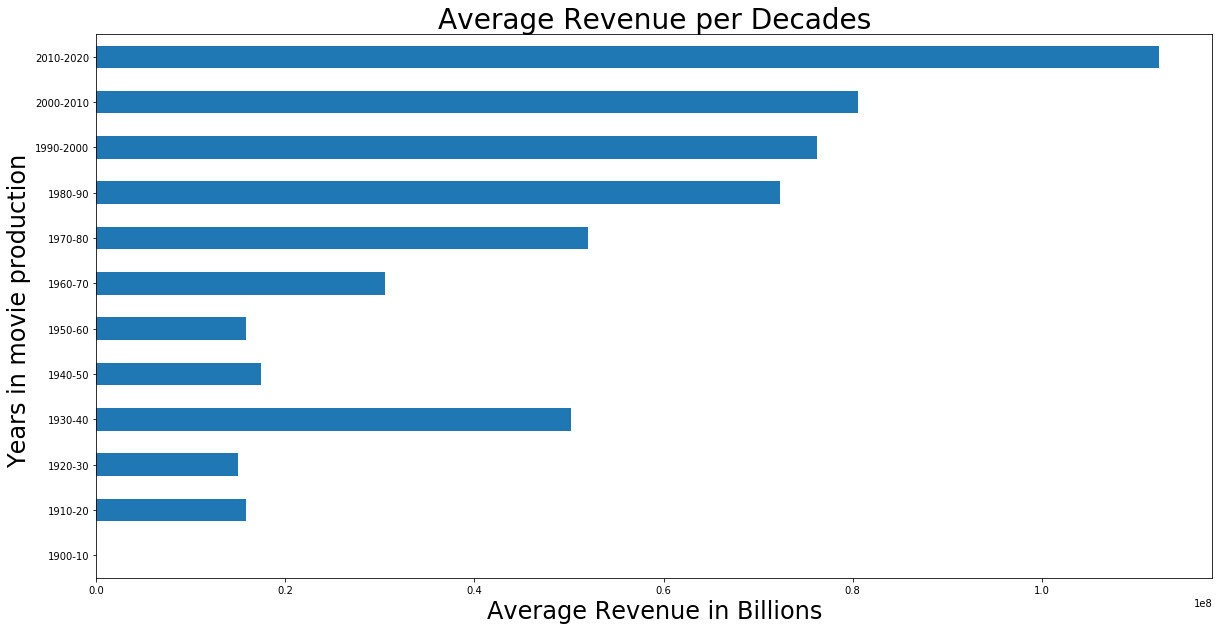

<Figure size 432x288 with 0 Axes>

In [81]:
#Plot Bar Graph for average revenue per decade

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
colors_list = list(colors._colors_full_map.values())
color_counter = 25
count_chart2 = count_year1.plot(kind='barh')

# Set the xlabel and ylabel using class methods
count_chart2.set_xlabel("Average Revenue in Billions", fontsize=24)
count_chart2.set_ylabel("Years in movie production ", fontsize=24)

plt.title("Average Revenue per Decades", fontsize=28)
plt.legend
plt.show()
plt.tight_layout()

In [82]:
#Create dataframe for frequency of Genre in movie dataset

Genre_df = pd.DataFrame({'Title' : p_moviedata['Title'],
                           'Genre': p_moviedata['Genre']})

#print(moviedata['Genre'])

# Use function to convert string to a list
def Convert(string): 
    li = list(string.split(",")) 
    return li 

# list to hold all Genre contained in dataset
l_Genre = []
for Genre in p_moviedata['Genre']:
   
    title_language_list = (Convert(str(Genre)))
    for individual_Genre in title_language_list:
        if individual_Genre != "nan":
            l_Genre.append(individual_Genre)

#Create second dataframe to store and sort all Genre spoken in movie dataset
Genre_df2 = pd.DataFrame({'Genre':l_Genre})

#Grouping by Genre to calculate total occurance

grouped_Genre_df2 = Genre_df2.groupby(["Genre"])
Genre_count = grouped_Genre_df2["Genre"].count()
movie_total = len(p_moviedata["Title"])
l_percentage = round(((Genre_count/movie_total)*100), 2)

#print(l_percentage)

# Convert to DataFrame
Genre_df3 = pd.DataFrame({"Count":Genre_count, "Percent Total": l_percentage})
Genre_df3
Genre_df3 = Genre_df3.sort_values("Count", ascending=False)
Genre_df3.head()

,Count,Percent Total
Genre,,
Drama,1554,33.92
Thriller,1308,28.55
Comedy,1185,25.86
Action,1034,22.57
Romance,1025,22.37


<function matplotlib.pyplot.legend(*args, **kwargs)>

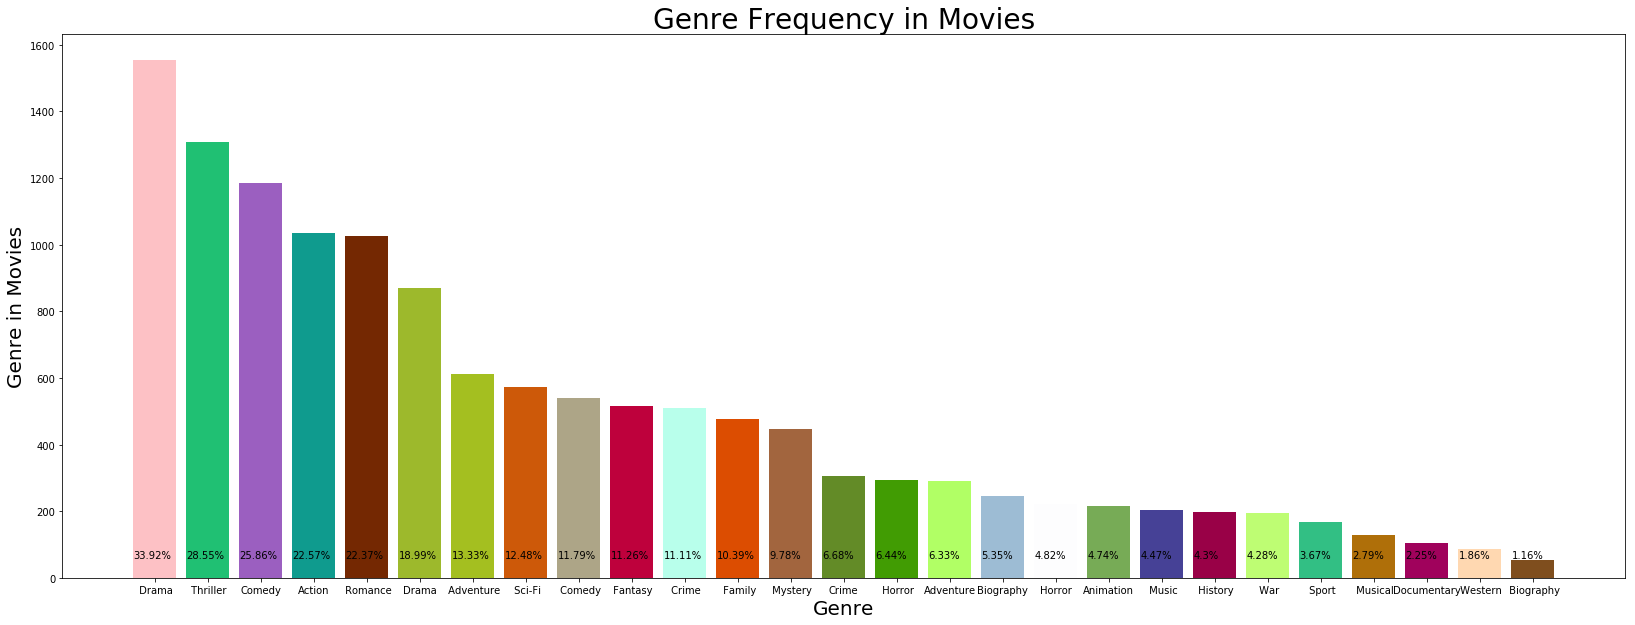

In [83]:
#Plot Bar Graph
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(28)

Genre_names = Genre_df3.index.values
x_axis = []
y_axis = []
label = []
colors_list = list(colors._colors_full_map.values())
color_counter = 81

for Genre_name in Genre_names:
    color_counter = color_counter + 7
    if Genre_df3.loc[Genre_name, "Percent Total"] > 1:
        x_axis.append(Genre_name)
        y_axis.append(Genre_df3.loc[Genre_name, "Count"])
        label.append((Genre_df3.loc[Genre_name,"Percent Total"]))

for j in range(len(x_axis)):
    ax.bar(x_axis[j], y_axis[j], color = colors_list[color_counter], align="center")
    color_counter = color_counter + 1
    label_percent = str(label[j]) + "%"
    ax.text(j-.4, 60, label_percent, style='normal', fontsize=10)


# Give the chart a title, x label, and y label

plt.title("Genre Frequency in Movies", fontsize=28)
plt.xlabel("Genre", fontsize=20)
plt.ylabel("Genre in Movies", fontsize=20)
plt.legend


# Save the Figure
# fig.savefig("Genre frequency in Movies")

In [84]:
# Original Dataframe used for Revenue, Budget information
path = "moviesapi_clean.csv"
df = pd.read_csv(path)
df.head()

,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,Awards,IMDB Rating,Revenue,Budget
0,Avatar,2009,PG-13,162,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"English, Spanish","UK, USA",Won 3 Oscars. Another 85 wins & 128 nominations.,7.8,2787965087,237000000
1,Pirates of the Caribbean: At World's End,2007,PG-13,169,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...","Mandarin, English",USA,Nominated for 2 Oscars. Another 20 wins & 44 n...,7.1,961000000,300000000
2,Spectre,2015,PG-13,148,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","English, Spanish, Italian, German, French","UK, USA",Won 1 Oscar. Another 7 wins & 32 nominations.,6.8,880674609,245000000
3,The Dark Knight Rises,2012,PG-13,164,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Arabic","UK, USA",Nominated for 1 BAFTA Film Award. Another 38 w...,8.4,1084939099,250000000
4,John Carter,2012,PG-13,132,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton (screenplay by), Mark Andrews (...",English,USA,2 wins & 8 nominations.,6.6,284139100,260000000


In [85]:
df["Rated"].unique()

array(['PG-13', 'PG', 'G', 'Not Rated', 'R', 'TV-14', 'Unrated', 'Passed',
       'NC-17', nan, 'Approved', 'APPROVED', 'GP', 'M', 'NOT RATED',
       'UNRATED', 'TV-G', 'TV-PG', 'TV-MA', 'PASSED', 'M/PG', 'X'],
      dtype=object)

In [86]:
#do .loc by genre and then create genre_groups=merged_df[["Genre", "Rated"]]. do rated_groups=genre_groups.groupby("Rated")

genre_groups=df.groupby(['Genre','Rated'])
counted_up=genre_groups.count()
counted_up.head()

Title  Year  Runtime  Director  Writer  Language  \
Genre             Rated                                                     
Action            PG-13      1     1        1         1       1         1   
                  R          4     4        4         4       4         4   
Action, Adventure PG         2     2        2         2       2         2   
                  PG-13     10    10       10        10      10        10   
                  R          3     3        3         3       3         3   

                         Country  Awards  IMDB Rating  Revenue  Budget  
Genre             Rated                                                 
Action            PG-13        1       0            1        1       1  
                  R            4       2            4        4       4  
Action, Adventure PG           2       2            2        2       2  
                  PG-13       10      10           10       10      10  
                  R            3       2            3        3       3

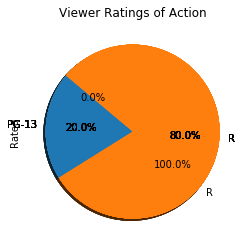

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

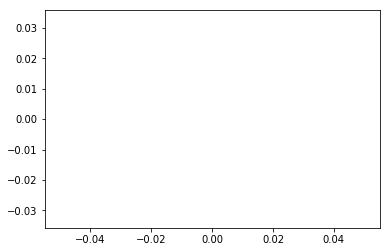

In [87]:
# Pie chart showing viewer rated movies of a specific genre

genre_id="Action"
one_genre=counted_up.loc[genre_id]
rated_list=one_genre.keys()
genre_pie=one_genre.plot(kind="pie",y=rated_list,title=("Viewer Ratings of "+genre_id), autopct="%1.1f%%", shadow=True, startangle=140, legend=None)
genre_pie.set_ylabel("Rated")
plt.show()
plt.tight_layout()
plt.axis("equal")
# plt.savefig("Graphs/GenreRatedPie.png")

#plt.legend(loc="upper right")

In [88]:
# Mean, median mode of revenue and budgets

budget_data= df["Budget"]
revenue_data=df["Revenue"]

print(f"Mean Budget: {mean(budget_data)}")
print(f"Median Budget: {budget_data.median()}")
print(f"Mode Budget: {mode(budget_data)}")
print(f"Mean Revenue: {mean(revenue_data)}")
print(f"Median Revenue: {revenue_data.median()}")
print(f"Mode Revenue: {mode(revenue_data)}")

NameError: name 'mean' is not defined

In [89]:
# Budget vs Runtime data

list_runtime=[]
runtime_hrs=[]
budget_tenmils=[]

for list_item in df['Runtime']:
    list_item=list_item.strip(' min')
    list_runtime.append(int(list_item))
    
for list_item in list_runtime:
    list_item= round(list_item/60,2)
    runtime_hrs.append(int(list_item))

#for budget_item in df["Budget"]:
    #budget_item= round(budget_item/10000000, 2)
    #budget_tenmils.append(int(budget_item))
    
x_axis = df["Budget"]
y_axis = runtime_hrs
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(fit)
fig, ax = plt.subplots()

fig.suptitle("Budget vs. Runtime", fontsize=16, fontweight="bold")

ax.set_xlim(0, 20)
ax.set_ylim(0, 20)

ax.set_xlabel("Movie Budget (Per Ten Million)")
ax.set_ylabel("Runtime (Hrs)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()
# plt.savefig("Graphs/LinRegressBudget.png")

AttributeError: 'int' object has no attribute 'strip'

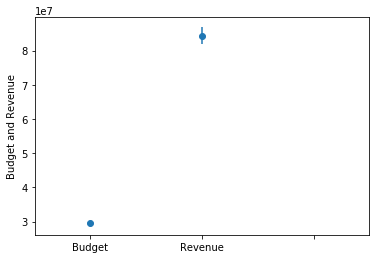

In [90]:
#Budget and Revenue t-test

budget_data = df["Budget"]
budget_means = np.mean(budget_data)
budget_sem = sem(budget_data)

revenue_data = df["Revenue"]
revenue_means = np.mean(revenue_data)
revenue_sem = sem(revenue_data)

means = [budget_means, revenue_means]
sems = [budget_sem, revenue_sem]
labels = ["Budget", "Revenue"]

fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(means)), means, yerr=sems, fmt="o")

ax.set_xlim(-0.5, 2.5)
ax.set_xticklabels(labels)
ax.set_xticks([0, 1, 2])

ax.set_ylabel("Budget and Revenue")

plt.show()
# plt.savefig("Graphs/ttest.png")

In [91]:
(t_stat, p) = ttest_ind(budget_data, revenue_data, equal_var=False)

if p < 0.05:
    print("The difference between budget and revenue is significant.")
else:
    print("The difference between budget and revenue is due to chance.")

print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))

The difference between budget and revenue is significant.
t-statistics is -21.807501844668373.
p-value is 6.448488197170402e-101.


In [92]:
# Revenue vs Runtime data

list_runtime=[]
runtime_hrs=[]

for list_item in df['Runtime']:
    list_item=list_item.strip(' min')
    list_runtime.append(int(list_item))
    
for list_item in list_runtime:
    list_item= round(list_item/60,2)
    runtime_hrs.append(int(list_item))

    
x_axis = df["Revenue"]
y_axis = runtime_hrs
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(fit)
fig, ax = plt.subplots()

fig.suptitle("Revenue vs. Runtime", fontsize=16, fontweight="bold")

ax.set_xlim(0, 20)
ax.set_ylim(0, 20)

ax.set_xlabel("Movie Revenue (Per Ten Million)")
ax.set_ylabel("Runtime (Hrs)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()
# plt.savefig("Graphs/LinRegressRevenue.png")

AttributeError: 'int' object has no attribute 'strip'